#**Disease Classification for Tomato**

Dataset Credit: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset

In [1]:
import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import os
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input

##**Pre-Processing**

In [12]:
# IMAGE_SIZE = 256
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3

###**Import dataset**

In [39]:
dataset = keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Deep Learning/tomato_disease/colour",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 4500 files belonging to 3 classes.


In [24]:
# # ImageDataGenerator
# data_generator = ImageDataGenerator(
#     preprocessing_function = vgg19_preprocess_input,
# )

In [40]:
# dataset = data_generator.flow_from_directory(
#     "/content/drive/MyDrive/Colab Notebooks/Deep Learning/tomato_disease/colour",
#     shuffle=True,
#     target_size = (IMAGE_SIZE,IMAGE_SIZE),
#     batch_size = BATCH_SIZE
# )

In [48]:
# class_indices = dataset.class_indices
# class_names = list(class_indices.keys())
# class_names

class_names = dataset.class_names
class_names

['Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___healthy']

In [41]:
# Define the preprocessing function
def preprocess_image(image, label):
    image = tf.cast(image, tf.float32)  # Ensure image is in float format
    image = vgg19_preprocess_input(image)  # Apply VGG19 preprocessing
    return image, label

In [42]:
# Apply preprocessing to the dataset
preprocessed_dataset = dataset.map(preprocess_image)

In [44]:
print(len(preprocessed_dataset),"batches")

141 batches


In [45]:
for image_batch, label_batch in preprocessed_dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

# num_batches = 1

# # Iterate over the dataset
# for i, (image_batch, label_batch) in enumerate(dataset):
#     if i >= num_batches:
#         break  # Exit the loop after processing the specified number of batches
#     print("Batch number:", i+1)
#     print("Image batch shape:", image_batch.shape)
#     print("Label batch shape:", label_batch.shape)
#     # print("Labels (one-hot encoded):", label_batch)

(32, 224, 224, 3)
[1 1 1 0 1 1 1 1 2 1 1 1 1 2 2 1 2 2 1 0 0 1 2 1 0 2 1 1 0 0 2 2]


###**Some Image Visualization**

In [50]:
# plt.figure(figsize=(10,10))
# for image_batch, label_batch in preprocessed_dataset.take(1):
#   for i in range(12):
#     ax = plt.subplot(3,4,i+1)
#     plt.imshow(image_batch[i].numpy().astype("uint8"))
#     plt.title(class_names[label_batch[i]])
#     plt.axis("off")

# # Plot the first batch of images and their labels
# plt.figure(figsize=(10, 10))
# num_images = 12  # Number of images to display

# # Get the first batch of images and labels
# image_batch, label_batch = next(dataset)

# for i in range(num_images):
#     ax = plt.subplot(3, 4, i + 1)
#     plt.imshow(image_batch[i].astype("uint8"))  # Convert images to uint8 for display
#     # If labels are one-hot encoded, get the index of the maximum value
#     if label_batch.ndim > 1:
#         label_index = label_batch[i].argmax()
#     else:
#         label_index = label_batch[i]
#     plt.title(class_names[label_index])
#     plt.axis("off")

# plt.tight_layout()
# plt.show()

###**Dataset Splitting**

- 80% => Training
- 10% => Validation during Epochs
- 10% => Test

In [58]:
train_size = 0.8
len(preprocessed_dataset)*train_size

112.80000000000001

In [59]:
train_ds = preprocessed_dataset.take(112) # take 112 batches
len(train_ds)

112

In [60]:
rem_ds = preprocessed_dataset.skip(112)
len(rem_ds)

29

In [61]:
val_size = 0.1
len(dataset)*val_size

14.100000000000001

In [62]:
val_ds = rem_ds.take(14)
len(val_ds)

14

In [63]:
test_ds = rem_ds.skip(14)
len(test_ds)

15

In [64]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

###**Cache, Shuffle and Prefetch the Dataset**

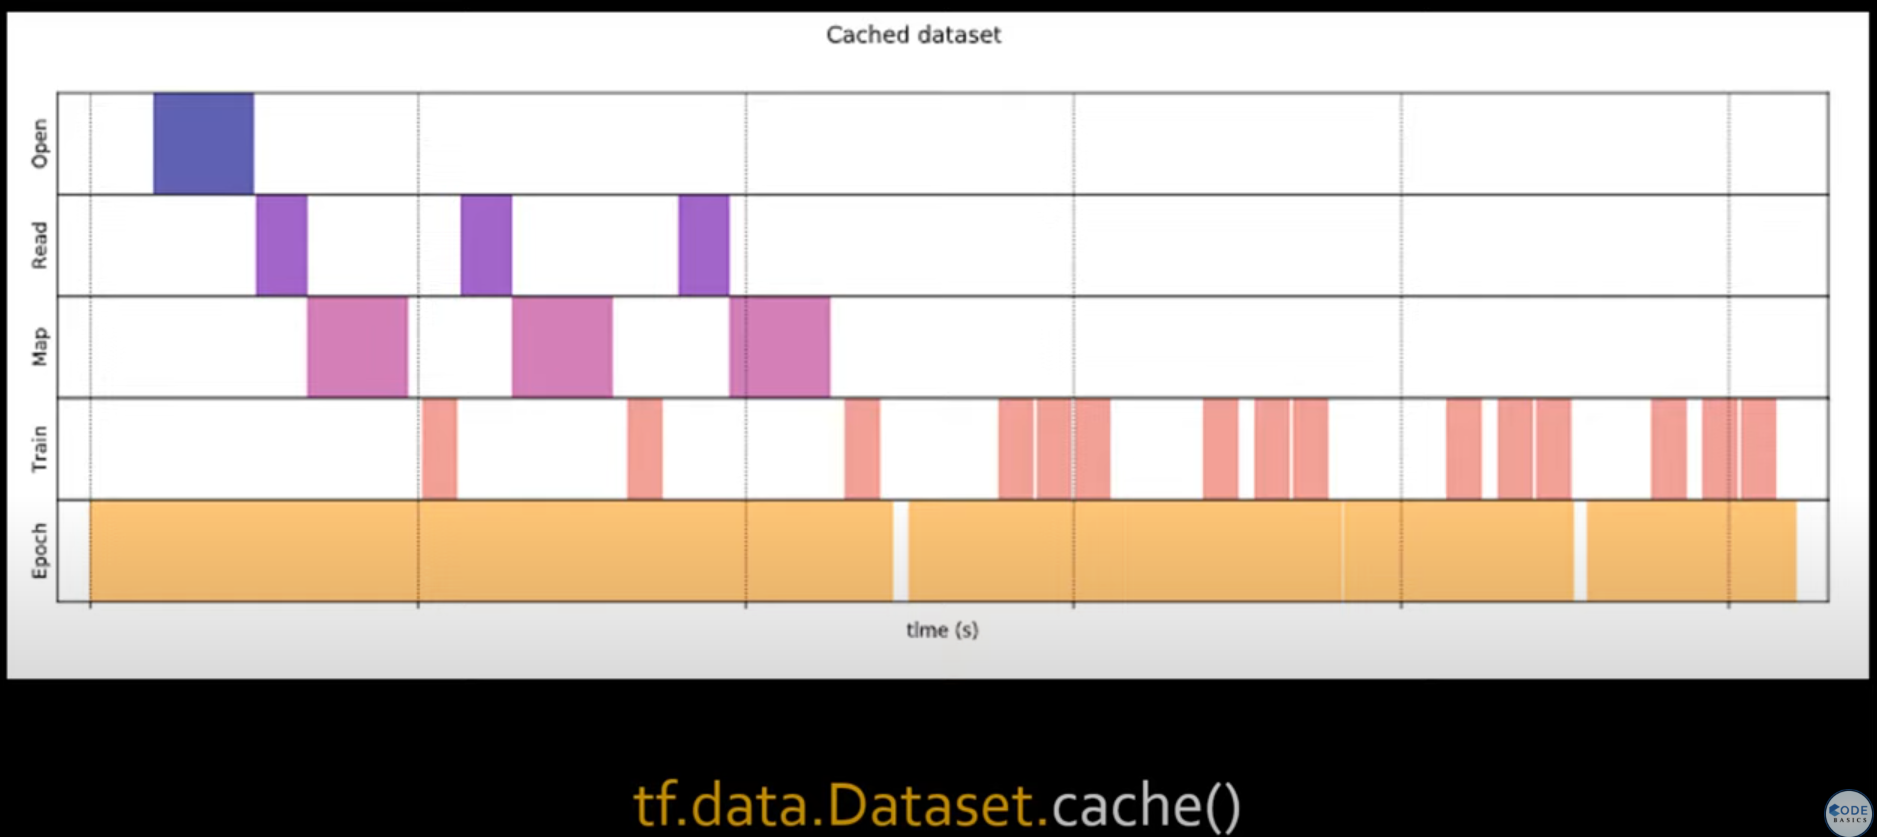

In [65]:
# This code optimizes data loading, shuffling, and prefetching to enhance training speed and efficiency.
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

###**Resizing and Normalization Layer**

In [ ]:
# resize_and_rescale = keras.Sequential([
#   layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
#   layers.experimental.preprocessing.Rescaling(1./255),
# ])

###**Data Augmentation**

In [ ]:
# data_augmentation = keras.Sequential([
#   layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#   layers.experimental.preprocessing.RandomRotation(0.3),
# ])

##**Model Building**

###**Convolutional Neural Network (CNN)**

#####**Model Architecture**

In [ ]:
# input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
# n_classes = 3

# model = models.Sequential([
#     resize_and_rescale,
#     layers.Conv2D(70, kernel_size = (3,3), activation='relu', input_shape=input_shape),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(200,  kernel_size = (3,3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(200,  kernel_size = (3,3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(200, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(200, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(200, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(200, activation='relu'),
#     # keras.layers.Dropout(0.5),
#     layers.Dense(n_classes, activation='softmax'),
# ])

# model.build(input_shape=input_shape)

In [66]:
# Build the model

n_classes = 3
model = Sequential()

model.add(VGG19(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

model.add(Dense(n_classes, activation='softmax'))

80134624/80134624 [==============================] - 4s 0us/step


In [67]:
model.layers

In [76]:
# Do not train vgg16
model.layers[0].trainable = False

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 dense (Dense)               (None, 3)                 1539      
                                                                 
Total params: 20025923 (76.39 MB)
Trainable params: 1539 (6.01 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


####**Model Compile**

In [69]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [85]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20
112/112 [==============================] - 30s 272ms/step - loss: 0.2932 - accuracy: 0.9102 - val_loss: 0.1420 - val_accuracy: 0.9375
Epoch 2/20
112/112 [==============================] - 31s 274ms/step - loss: 0.1418 - accuracy: 0.9528 - val_loss: 0.1244 - val_accuracy: 0.9598
Epoch 3/20
112/112 [==============================] - 31s 273ms/step - loss: 0.1282 - accuracy: 0.9587 - val_loss: 0.1200 - val_accuracy: 0.9621
Epoch 4/20
112/112 [==============================] - 31s 274ms/step - loss: 0.1336 - accuracy: 0.9461 - val_loss: 0.1135 - val_accuracy: 0.9420
Epoch 5/20
112/112 [==============================] - 31s 277ms/step - loss: 0.0743 - accuracy: 0.9738 - val_loss: 0.0619 - val_accuracy: 0.9732
Epoch 6/20
112/112 [==============================] - 31s 279ms/step - loss: 0.0513 - accuracy: 0.9824 - val_loss: 0.1011 - val_accuracy: 0.9665
Epoch 7/20
112/112 [==============================] - 31s 280ms/step - loss: 0.0878 - accuracy: 0.9676 - val_loss: 0.1742 - val_ac

In [86]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [87]:
scores = model.evaluate(test_ds)

15/15 [==============================] - 2s 103ms/step - loss: 0.0728 - accuracy: 0.9744


In [88]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

test_loss_score = scores[0]
test_accuracy_score = scores[1]

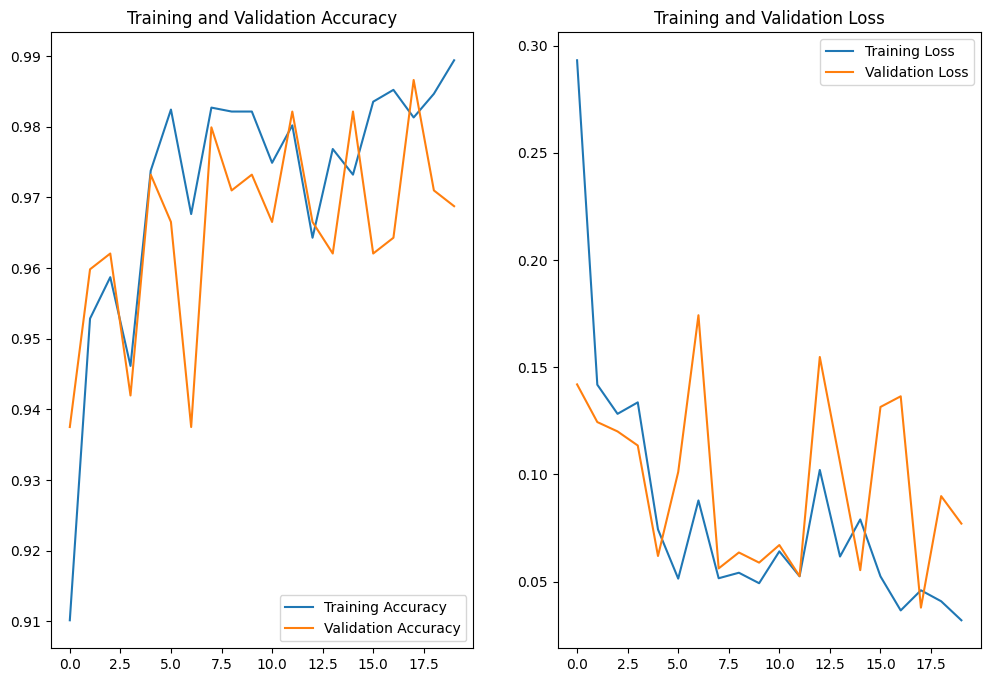

In [89]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(range(20), acc, label='Training Accuracy')
plt.plot(range(20), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), loss, label='Training Loss')
plt.plot(range(20), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

####**Sample Image Prediction**

first image to predict
actual label: Tomato___healthy
1/1 [==============================] - 0s 199ms/step
predicted label: Tomato___healthy


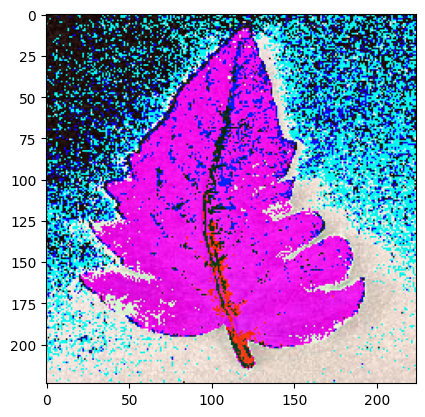

In [90]:
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [92]:
# def predict(model, img):
#     img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
#     img_array = tf.expand_dims(img_array, 0)

#     predictions = model.predict(img_array)

#     predicted_class = class_names[np.argmax(predictions[0])]
#     confidence = round(100 * (np.max(predictions[0])), 2)
#     return predicted_class, confidence

In [91]:
# plt.figure(figsize=(15, 15))
# for images, labels in test_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))

#         predicted_class, confidence = predict(model, images[i].numpy())
#         actual_class = class_names[labels[i]]

#         plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

#         plt.axis("off")

###**Saving our Model**

In [ ]:
# model.save(f"/content/drive/MyDrive/Colab Notebooks/Deep Learning/tomato_disease/models/{1}")

In [93]:
# model.save(f"/content/drive/MyDrive/Colab Notebooks/Deep Learning/tomato_disease/models/tomato_2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# import os
# model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
# model.save(f"../models/{model_version}")